In [1]:
import os
import sys
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from functions.prices_returns import calculate_returns
from functions.distributions import Gaussian, TStudent
from src.stochastic_volatility import GARCH, GJRGARCH

Select market data. Further, choose frequency and type.

In [2]:
market_indices = pd.read_csv('market_indices.csv', parse_dates=['Date'], index_col='Date')

market_returns_log = calculate_returns(market_indices, 'D', log_returns=True)
market_returns_net = calculate_returns(market_indices, 'D', log_returns=False)

#### GARCH(1,1) with Gaussian Innovation

In [3]:
error_dist = Gaussian()
data_input = market_returns_net.DJI

my_GARCH = GARCH(data = data_input, ErrorDistribution = error_dist)
my_GARCH.fit()
my_GARCH.opt_param

array([2.70872452e-06, 1.24827586e-01, 8.55172414e-01])

Predicted Variance given data and optimized parameters:

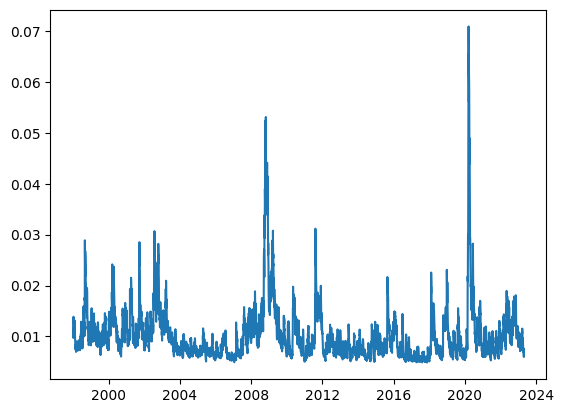

In [4]:
plt.plot(np.sqrt(my_GARCH.pred_variance))
plt.show()

Standardized residuals: $ \epsilon_t = \dfrac{r_t}{\sigma_t}$

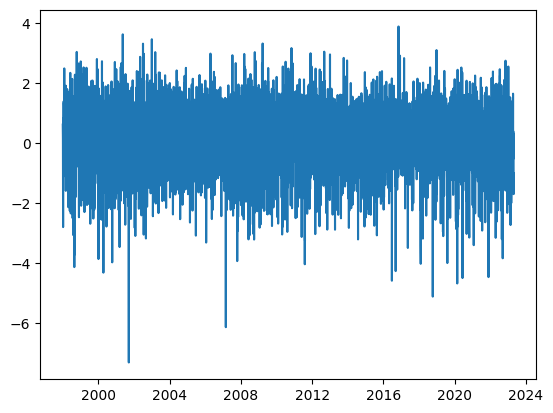

In [5]:
plt.plot(my_GARCH.std_residuals)
plt.show()

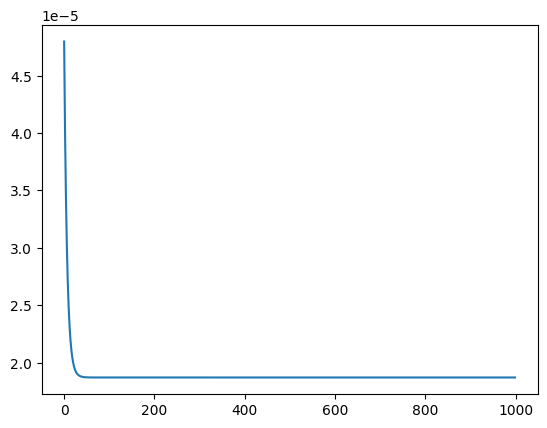

In [6]:
my_GARCH.forecast(steps=1000)

plt.plot(my_GARCH.forecast(steps=1000))